In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [14]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_dom,D/loss_gp,D/loss_td_real,D/loss_td_fake,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot,G/loss_td_fake
0,0:00:07,100,-0.8862,0.5167,0.9281,4.1280,0.0336,-8.7627,4.2551,-0.5736,0.2117,0.9314,4.1245,0.2191,-4.3506
1,0:00:11,200,-0.1883,-0.1843,0.9182,4.1622,0.0191,-2.8118,-0.0204,0.1684,0.1435,0.8827,4.1559,0.1423,-0.1073
2,0:00:16,300,0.0952,-0.4447,1.0394,4.1808,0.0226,-1.7537,-1.5377,0.4163,0.1238,1.0431,4.1804,0.1423,1.6125
3,0:00:20,400,-0.1588,-0.2461,1.2209,4.1327,0.0227,-2.0390,-1.1638,0.2743,0.1182,1.1519,4.1426,0.1557,1.1721
4,0:00:24,500,-0.0302,-0.3167,1.1070,4.1260,0.0151,-2.1317,-0.3154,0.2545,0.1069,1.0725,4.1354,0.1273,0.0927


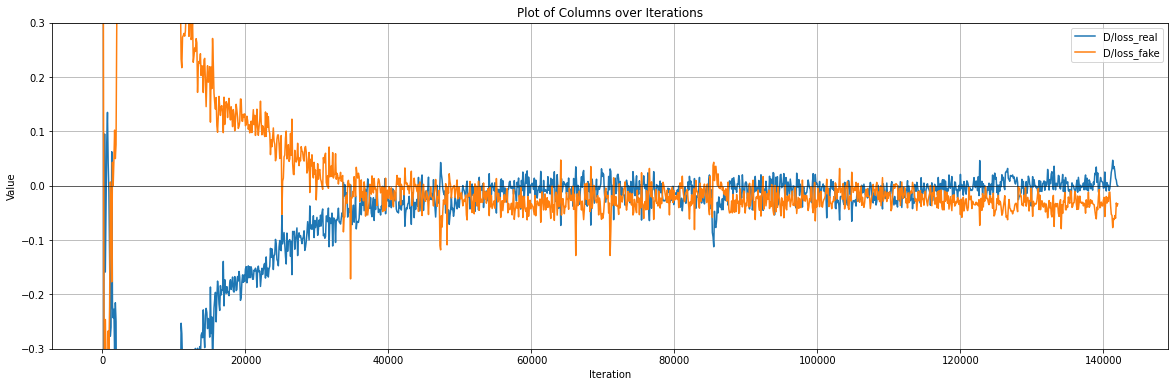

In [16]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

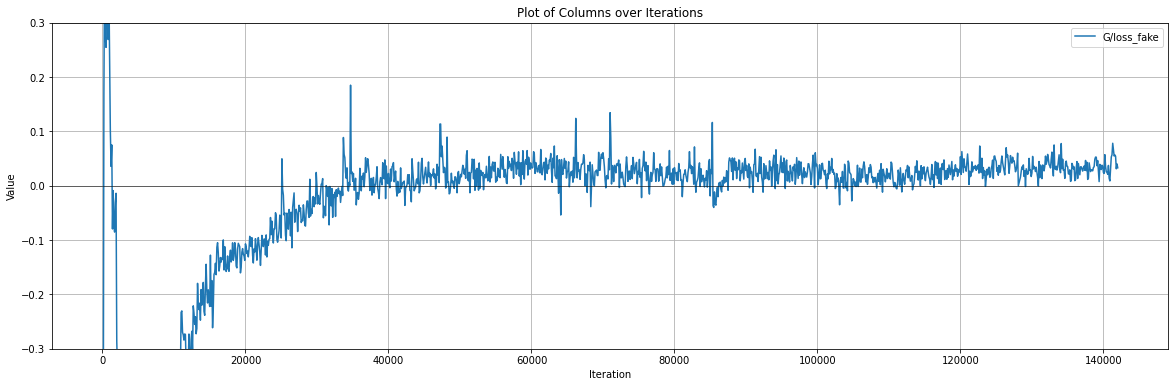

In [17]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

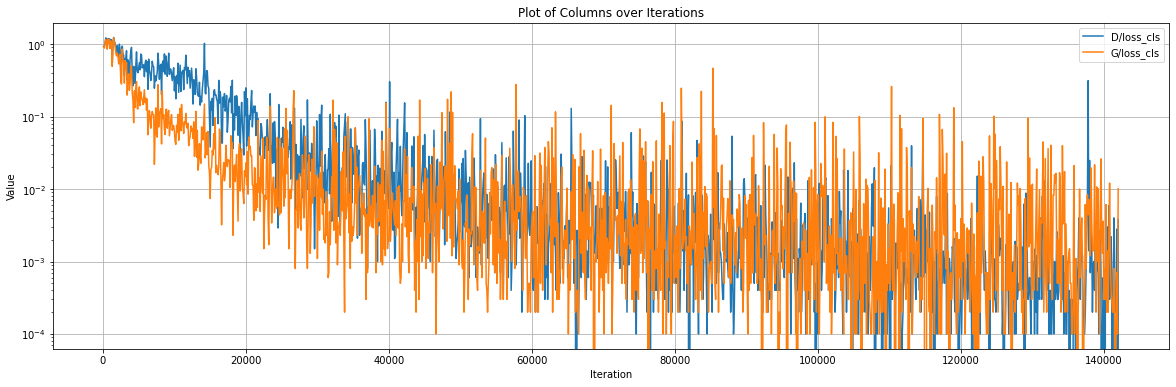

In [18]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

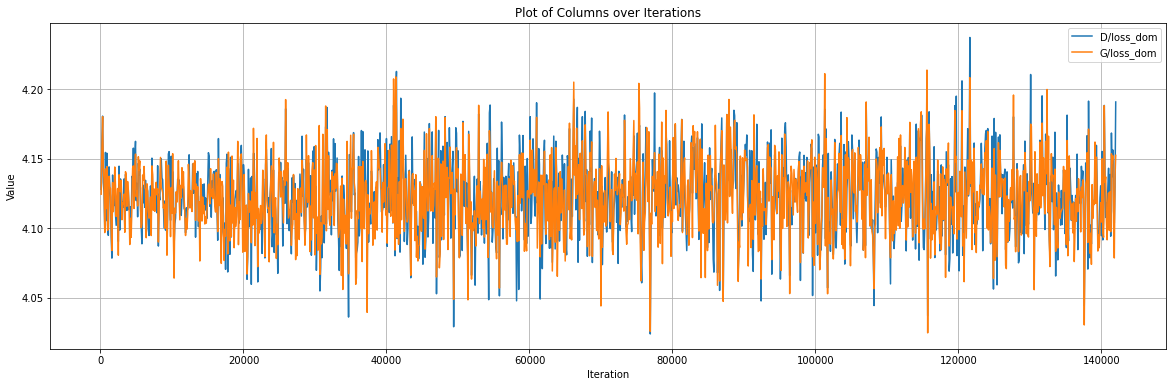

In [19]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=False, hline=False)

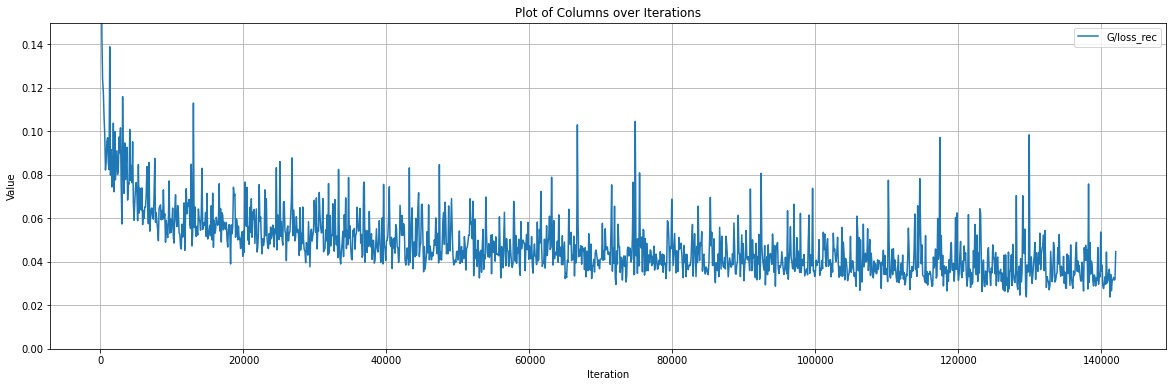

In [20]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

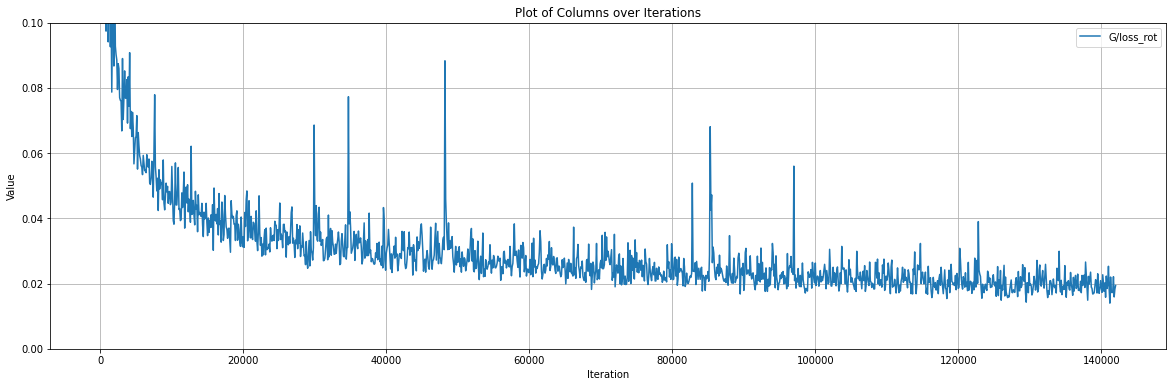

In [21]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

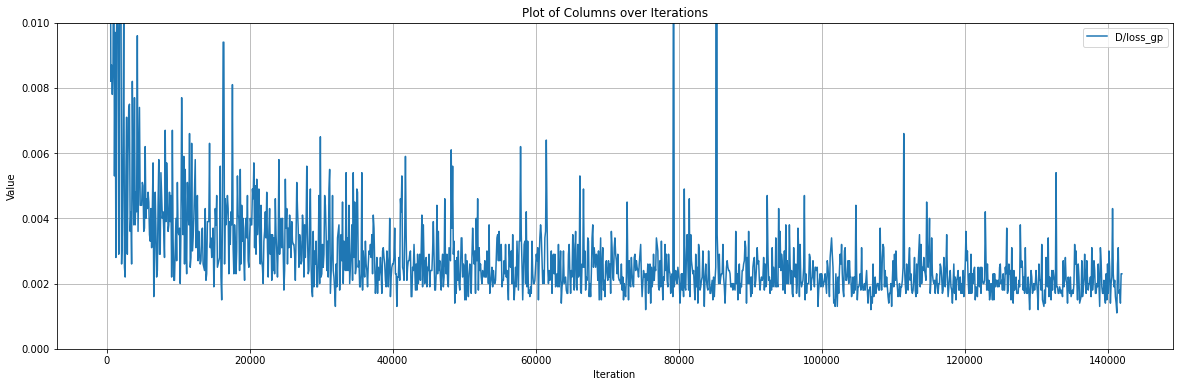

In [22]:
plot_columns(history, ['D/loss_gp'], logaxis=False, ylim=(0, 0.01))

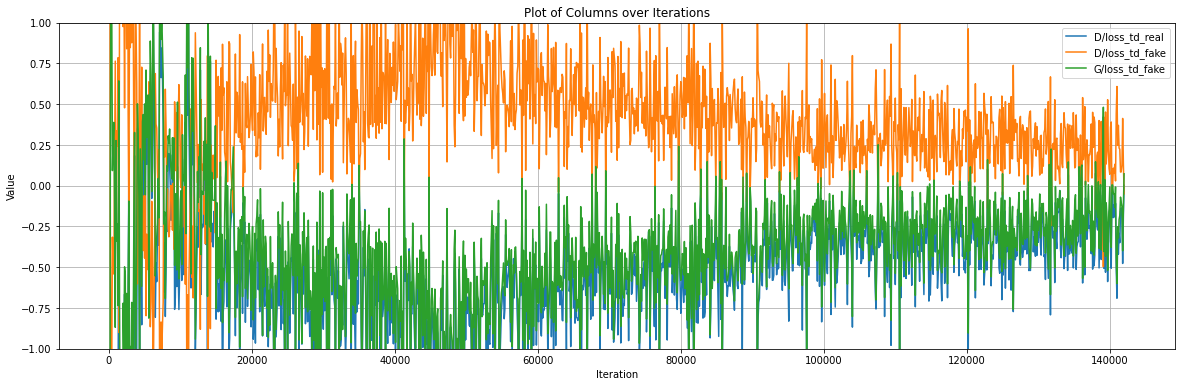

In [23]:
plot_columns(history, ['D/loss_td_real', 'D/loss_td_fake', 'G/loss_td_fake'], logaxis=False, hline=False, ylim=(-1, 1))

# Metrics

## TSTR Score

In [24]:
file_path = 'results/mobiact_realworld_TSTR.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,domain,loss,accuracy,f1
0,10000,61,7.866012,0.255,0.111430
1,10000,62,5.275501,0.285,0.207915
2,10000,63,3.594512,0.455,0.351515
3,10000,64,5.050703,0.220,0.164812
4,10000,65,4.124280,0.375,0.309498


Maximum average accuracy: 0.3708 at step 20000
Maximum average F1 score: 0.3259 at step 90000


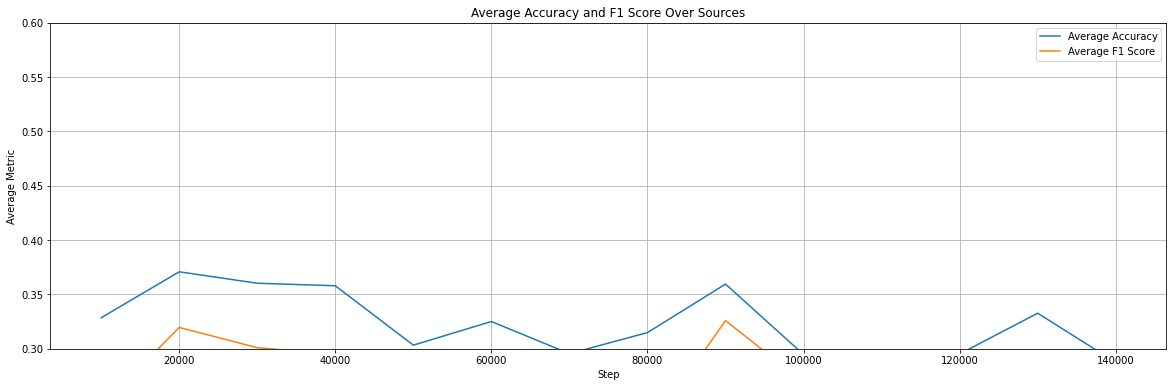

Minimum average loss: 4.6913 at step 20000


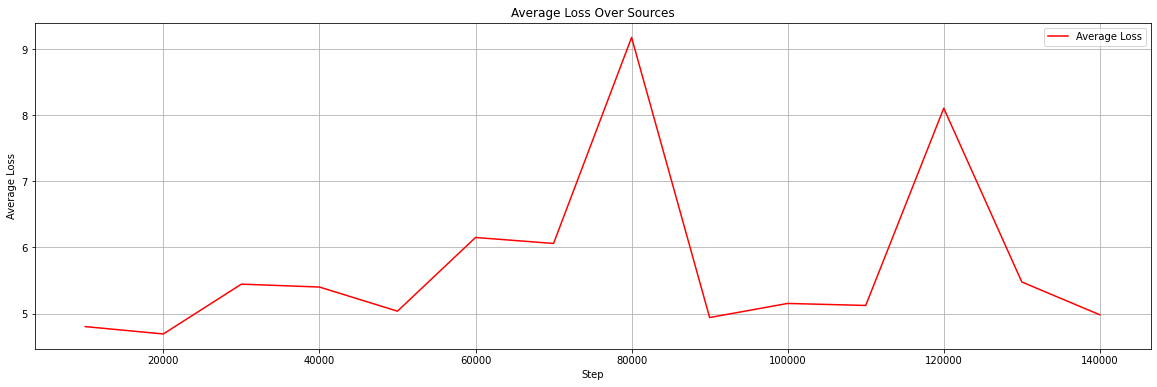

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(metrics, ylim=None):
    # Filter the DataFrame based on the metrics
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({'accuracy': 'mean', 'f1': 'mean', 'loss': 'mean'}).reset_index()

    # Plotting accuracy and F1 scores in the same plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['accuracy'], label='Average Accuracy')
    plt.plot(mean_data['step'], mean_data['f1'], label='Average F1 Score')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Find the maximum value of accuracy and F1 score and their corresponding steps
    max_accuracy = mean_data['accuracy'].max()
    max_accuracy_step = mean_data[mean_data['accuracy'] == max_accuracy]['step'].values[0]
    print(f'Maximum average accuracy: {max_accuracy:.4f} at step {max_accuracy_step}')
    
    max_f1 = mean_data['f1'].max()
    max_f1_step = mean_data[mean_data['f1'] == max_f1]['step'].values[0]
    print(f'Maximum average F1 score: {max_f1:.4f} at step {max_f1_step}')

    plt.title('Average Accuracy and F1 Score Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Metric')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting loss in a separate plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['loss'], label='Average Loss', color='red')
    
    # Find the minimum value of the loss and its corresponding step
    min_loss = mean_data['loss'].min()
    min_loss_step = mean_data[mean_data['loss'] == min_loss]['step'].values[0]
    print(f'Minimum average loss: {min_loss:.4f} at step {min_loss_step}')

    plt.title('Average Loss Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_metrics(classification_scores, ylim=(0.3, 0.6))